In [94]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
data=pd.read_csv("maaslar.csv")

data.sample(2)

,unvan,Egitim Seviyesi,maas
2,Uzman Yardimcisi,3,3000
9,CEO,10,50000


In [96]:
#Unvan -- UnvanSeviyesi aynı temsil etmektir. O yüzden Unvan silinicektir.
#CalisanID problem için gereksizdir. Model öğrenmesinde etkisi yoktur.

veriler=data.drop(["unvan"],axis=1)
veriler.head()

,Egitim Seviyesi,maas
0,1,2250
1,2,2500
2,3,3000
3,4,4000
4,5,5500


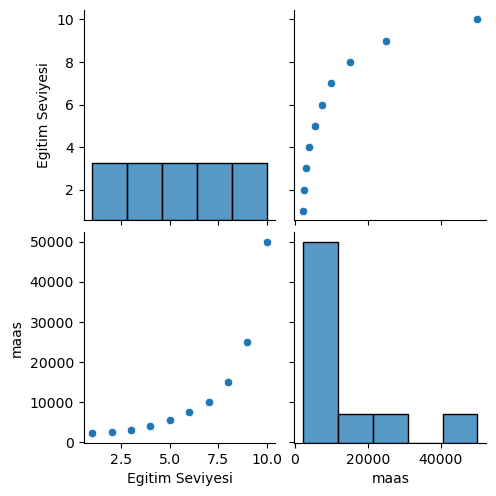

In [97]:
#Veri setini görselleştirme
sns.pairplot(veriler)

In [98]:
X=veriler.iloc[:,0].values
y=veriler.iloc[:,1].values

In [99]:
X=X.reshape(-1,1)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [102]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

##### Lineer Regression versus Poly. Regression ;

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

lin_reg.fit(X_train,y_train)


LinearRegression()

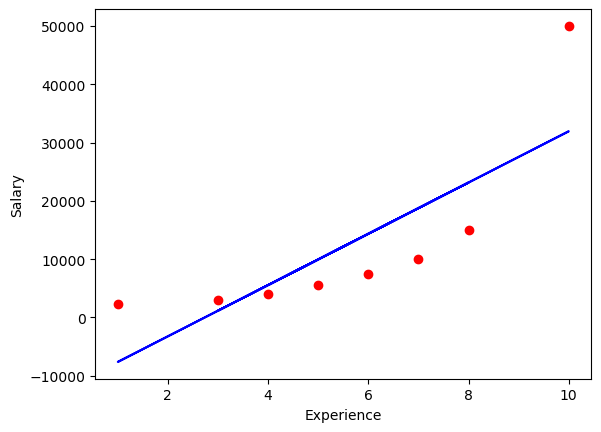

In [104]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train.squeeze(), lin_reg.predict(X_train), color = 'b')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

Not good model, isn't it ?

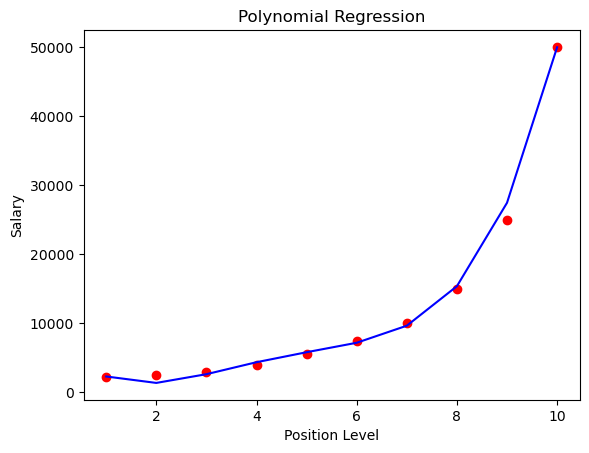

In [105]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


#bunu görselleştirelim..
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [108]:
print('Training data accuracy:', lin_reg_2.score(X_poly, y_train))
print('Test data accuracy:', lin_reg_2.score(X_poly_test, y_test))

Training data accuracy: 0.9995857211026754
Test data accuracy: 0.9714666803841024


In [109]:
#Done!